# Ch3. ML Classifier Using Scikit-learn

다음 순서로 설치

- `pip3 install numpy`
- `pip3 install scipy`
- `pip3 install scikit-learn`

## 1. Perceptron

### 1.1 iris 데이터 가져오기

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

### 1.2 tran, test 데이터 나누기

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

책에서 `from sklearn.cross_validation import train_test_split`이라 돼있는데 앞으로 deprecated될거라고 한다. 아래처럼 `sklearn.model_selection import train_test_split`을 써야.

총 150개 데이터 중 3:7 비율로 test, train 데이터 나눔

### 1.3 feature scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

데이터를 표준화하는 과정이다.

- `sc.fit(X_train)` : train 데이터에 대해 평균과 표준편차를 구한다.
- `sc.transform(X_train)` : 구해진 평균과 표준편차를 활용해 X_train 데이터를 표준화한다. X_test 데이터에 대해서도 마찬가지. X_train을 활용해 구한 평균과 표준편차를 활용해서 두 데이터 모두를 표준화하는 것이 중요. 즉 같은 scaling parameter를 활용해야 비교 가능하다.

### 1.4 train perceptron

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

- `Perceptron(n_iter=40, eta0=0.1, random_state=0)`
    + epochs(반복)는 40번, learning rate은 0.1
    + random_state에 seed 값(정수)을 지정해서 나중에 다시 코드를 실행해도 같은 값이 나오도록 함
- `ppn.fit(X_train_std, y_train)` : train 데이터로 학습

In [5]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 4


- 학습된 ppn을 활용해서 `X_test_std` 데이터의 답을 예측한다.
- 실제 답인 `y_test`와 예측값 `y_pred`의 값을 비교해본다.
- 45개 테스트 데이터 중 41개를 맞췄으니 약 91.1 퍼센트의 정확도다.

### 1.5 성능 metric 측정

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


- `accuracy_score` 메소드를 활용해서 쉽게 성능 측정 가능

### 1.6 시각화

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

위에서 정의한 함수를 활용해 결과를 시각화해본다. 아래 그림에서처럼 perceptron은 선형으로 분리될 수 없는 데이터에서 별로 효력을 발휘하지 못한다.

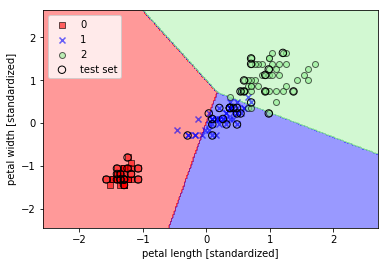

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 2. Logistic regression

### 2.1 Sigmoid function

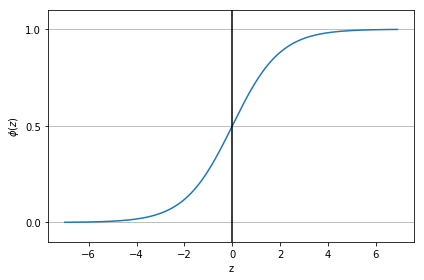

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

- 베르누이 시행에서 우리가 구하고자 하는 사건의 확률을 `p`라 했을 때 이 `p`와 그렇지 않을 확률 `1-p`의 비율을 odds ratio라고 한다.
- odds ratio에 log를 씌우면 logit 함수가 된다. `logit(p) = log p/(1-p)`
- logit 함수의 역수가 logistic 함수이고 sigmoid 함수라고도 한다.
- 시그모이드 함수는 계단함수가 선형화된 모습이다. x축의 값이 0일 때 y 값이 0.5가 되고, 이를 기준으로 선택하게된다.
- 즉 x축 값이 0보다 크면 A, 작으면 B 선택. 이렇게 시그모이드 함수의 출력값을 통해 선택하는 부분을 Quantizer(양자화기)라고 한다.

### 2.2 구현

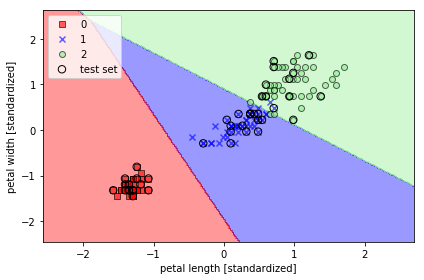

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

- `LogisticRegression` 메소드를 활용해서 모델 생성
- 매개변수 C
    + 분산과 bias의 균형점을 찾기 위해 정규화를 하는데 강도의 정도를 나타낸다.
    + logistic regression의 cost function에서 마지막에 정규화항을 더하게 되는데 `lambda/2 * ||w||^2` 이 때 lambda를 정규화 parameter라고 한다.
    + `C = 1 / lambda` : C는 lambda와 식과 같은 관계를 가짐. C를 감소시키면 정규화 강도를 증가하는 것이고, 증가시키면 정규화 강도를 낮춘다.

In [11]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

- 원하는 row 데이터를 선택해서 어느 종에 속하는지 확률로 나타낼 수 있다. 아래 코드 결과에서는 93.7퍼센트로 3번째 값이 선택된다.

### 2.3 정규화, 오버피팅

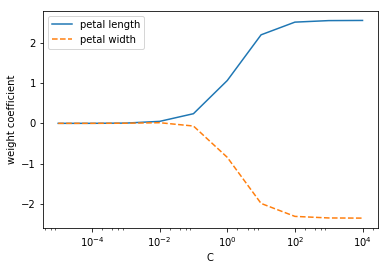

In [12]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

![regularization](http://www.holehouse.org/mlclass/07_Regularization_files/Image%20[5].png)

- 정규화: parameter가 너무 작거나 큰 값을 가지면 잘못 학습이 될 수 있다. 그래서 원래의 목표함수에 모든 weight의 제곱의 합을 더하거나(ridge regression), 그냥 절대값을 더하거나(lasso) 해서 정규화한다.
- 위 도표는 C 값에 따라 coefficient(계수) 값이 어떻게 달라지는지 보여준다. C의 값을 늘리면 정규화 강도 증가를 의미한다.

## 3. Support Vector Machine

![Imgur](http://i.imgur.com/mM6w2sP.png)

- SVM 알고리즘의 목표는 margin을 최대화하는 것
- hyperplane: p차원에서 선형함수. 즉 p차원에서 값들을 분리하는 기준이 되는 것. 2차원에선 직선이고, 3차원에선 평면. 해당 함수보다 값이 큰 영역을 positive hyperplane, 작은 영역을 negative hyperplane이라 한다.
- Support vector: hyperplane과 가장 가까운 데이터 샘플들
- margin: positive hyperplane의 support vector와 negative hyperplane의 support vector 간의 거리
    + margin이 크다: 일반화 오차가 낮다.
    + margin이 작다: overfitting 경향이 크다.
- 위에서 언급한 `C`의 값을 활용해서 margin의 너비를 조정할 수 있다.

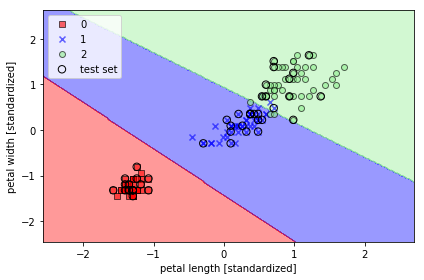

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

- 데이터가 굉장히 클 때는 컴퓨터 메모리에 올려서 작업하기가 적합히지 않다. `SGDClassifier` 클래스를 활용하면 이 문제를 해결 가능.
    - 라이브러리 : `from sklearn.linear_model import SGDClassifier`
    - perceptron : `ppn = SGDClassifier(loss='perceptron')`
    - logistic regression : `lr = SGDClassifier(loss='log')`
    - svm : `svm = SGDClassifier(loss='hinge')`

## 4. Non-linear with kernel SVM

### 4.1 kernel에 대해서

[다크 프로그래머 블로그](http://darkpgmr.tistory.com/147)에 가면 kernel에 대해 매우 자세하게 설명되어있다. 감사합니다.

![kernel](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Kernels.svg/1180px-Kernels.svg.png)

> kernel function의 종류. 출처: 위키피디아

- kernel function: 수학적으로 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수. 가우시안, Epanechnikov, uniform 함수가 대표적
- KDE(Kernel Density Estimation): 밀도 추정 방식 중 non-parametric 방식의 하나다. 기존 non-parametric 방식 중 하나인 히스토그램이 경계에서 불연속적이기 때문에 kernel function을 이용하여 smoothening 한 것.
- 어떻게 smoothening 할 것인가

    ![Imgur](http://i.imgur.com/6yLXt2e.png)

    + 위 PDF(Probability Density Function)에서 x는 random variable, xi는 관측된 샘플 데이터, K는 커널이다. h는 커널이 뾰족한 형태(작은 값)인지 완만한(큰 값) 형태인지를 나타낸다.
    + 관측된 데이터 각각을 중심으로 하는 커널 함수를 생성한다. `K(x-xi)`
    + 만들어진 모든 함수를 더해서 전체 데이터 개수로 나눈다.

![kernel-func](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/1000px-Comparison_of_1D_histogram_and_KDE.png)

- h 값에 따라 smoothing 정도가 달라진다. 회색(true density: standard normal), 빨강, 검정, 녹색 순으로 h 값은 0.05, 0.337, 2다. 높아질수록 완만해짐.

![kde-h](https://upload.wikimedia.org/wikipedia/en/thumb/e/e5/Comparison_of_1D_bandwidth_selectors.png/440px-Comparison_of_1D_bandwidth_selectors.png)

- KDE를 활용할 때 가장 중요한 것은 어떤 커널 함수를 사용할지와 h값을 어떻게 설정할지라고 한다.
    + 최적은 Epanechnikov 커널 함수
    + 가우시안도 많이 사용하는데 이 때 h 값은 `h = ((4 * 𝛔^5) / 3n)^(1/5) = (1.06 * 𝛔n)^(-1/5)`

    ![h value](https://wikimedia.org/api/rest_v1/media/math/render/svg/9ec402653306a6af7383bc50062be20d557508b2)

### 5.2 XOR 데이터 만들기

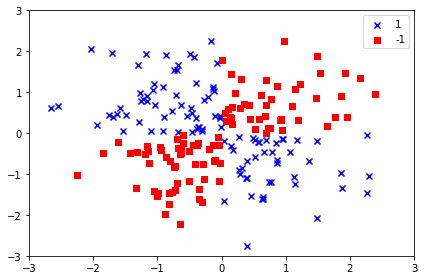

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

- `X_xor = np.random.randn(200, 2)` : 200 by 2 매트릭스를 만드는데 값을 0과 1 사이의 난수로 한다.
- `X_xor[:, 0] > 0`, `X_xor[:, 1] > 0` : 각각 X_xor의 0번 컬럼, 1번 컬럼이 0보다 이상이면 True, 아니면 False로 값을 설정해서 새로운 np.array를 리턴한다.
- `y_xor = np.logical_xor(data1, data2)` : xor 연산을 행한 결과를 리턴한다. data1, 2는 같은 크기여야함. 즉 y_xor의 값은 X_xor 데이터의 각 행(x,y 좌표)이 True인지 False인지 값을 가지고 있다.
- `plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1])` : y_xor의 값이 1인 지점, 즉 xor연산이 True인 좌표를 골라서 점을 찍는다.

### 5.3 고차원 공간에서 hyperplane 찾기

- train 데이터로 학습하기
    + 선형으로 분리할 수 없는 데이터는 기존에 가지고 있던 feature들을 조합해서 새로운 비선형 feature를 만들어낸다.
    + `mapping function ϕ(x1, x2) = (z1, z2, z3) = (x1, x2, x1^2 + x2^2)` : 이렇게 고차원으로 바꾸면 신기하게도 3차원에서 hyperplane이 정확하게 중간 좌표들만 '높이'값을 활용해서 선형으로 구분할 수 있다.
    + 고차원에서의 선형 SVM 모델을 학습시켜둔다.
- test 데이터 검증하기
    + test 데이터를 train 데이터처럼 같은 방식으로 고차원으로 투영한 후 기존 모델을 활용해 분류한다.
    + 해당 데이터를 다시 2차원으로 되돌려서 활용

### 5.4 kernel trick

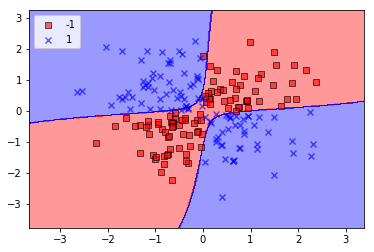

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.show()

- 위 5.3의 고차원 투영 방식은 계산량이 매우 크게 늘어난다는 문제가 있다.
- 그래서 기존 `(xi)T * xj`가 고차원으로 투영돼 `ϕ((xi)T) * ϕ(xj)`로 대체되는 과정 대신 kernel function K를 활용한다.
- 이를 kernel trick이라 하고 가장 자주 사용하는 것이 RBF kernel(Radial Basis Function kernel)과 Gaussian kernel이다.
    + ![rbf-kernel](https://wikimedia.org/api/rest_v1/media/math/render/svg/c16fd6c515412f96a57506103896178d0e8af77d)
    + 위 공식은 RBF kernel이고 분모를 gamma로 치환해서 간소화하기도 한다. 이 gamma 값을 조정해가면서 최적화해야한다.
- RBF를 활용하는 위 코드는 XOR을 정확하게 분리해낸다.

### 5.5 iris에 kernel trick 적용

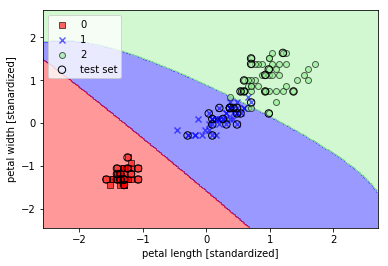

In [17]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stanardized]')
plt.legend(loc='upper left')
plt.show()

- gamma 값이 크면 경계가 부드러워지고, 작으면 경계가 타이트해진다.
- 너무 값을 작게해서 경계를 타이트하게 하면 overfitting 문제가 발생할 수 있다.

## 6. Decision tree

### 6.1 기본

![decision-tree](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/700px-CART_tree_titanic_survivors_KOR.png)

- 위 이미지처럼 일련의 "질문"들을 거쳐서 데이터를 쪼개가는 과정이다. 다른 분석들에 비해 직관적이고 이해하기 쉽다. 뉴럴넷은 hidden layer가 있는 분석가가 알기 어려운 블랙박스 모델이지만 decision tree는 화이트박스 모델이다.
- 계산 비용이 낮아서 대량의 데이터에서도 빠르게 연산 가능
- 가장 큰 IG(Information Gain) 값을 도출하는 feature를 찾고 이를 통해 노드를 분류한다.
- 트리가 너무 깊어지면 overfitting 문제가 발생하므로 최대 깊이 제한을 둔다.
- 종류
    + regression tree : 출력이 연속형(숫자)
    + classification tree : 출력이 범주형
    
### 6.2 gini, entropy 구현

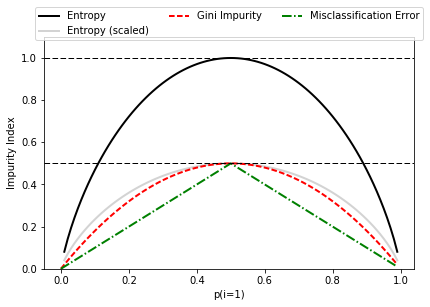

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.3 Decision tree 구현

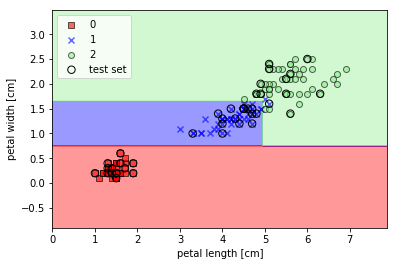

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### 6.4 이미지 파일로 도표 변환

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['petal length', 'petal width'])

- [graphviz](http://graphviz.org/)에서 다운받고 설치
- `dot -Tpng tree.dot -o tree.png` : 왼쪽 명령으로 위 코드에서 만든 dot 파일을 이미지로 변환

## 7. Random forests

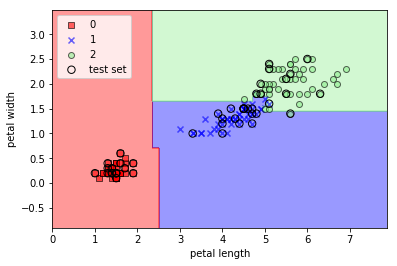

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## 8. KNN(K-nearest neighbor)

### 8.1 기본

- lazy leraner: KNN은 lazy learner 류의 방식이다. train 데이터를 활용해서 함수를 학습하는게 아니라 데이터를 기억하기 때문
- parametric model
    + 새로운 데이터를 분류하는 우리의 모델, 즉 함수를 학습하기 위해 train 데이터셋에서 parameter를 추정한다. 학습이 끝난 후 train 데이터셋은 더이상 필요없다.
    + 사례: Perceptron, Logistic regression, linear SVM
- nonparametric model
    + parameter가 딱 정해진 것이 아니라 train 데이터셋과 함께 개수가 증가한다. parametric model에 비해 계산 비용이 높다.
    + 사례: decision tree classifier, random forest, kernel SVM, KNN
- KNN은 nonparametric model의 하나이고, instance-based learning이다. instance-based learning은 훈련 데이터셋을 "기억"하는 것이 특징이다.
- lazy learning은 instance-based learning 중에서도 학습 과정에서 cost가 없는 특별한 케이스다. "학습"할 필요가 없어서 학습에 대한 cost는 없는거지만 막상 분류할 때는 다른 방식에 비해 cost가 높다. 샘플 숫자가 커지면 더더욱 분류 cost가 커진다.

### 8.2 분류 방식

- k에 해당하는 숫자와 거리 메트릭 선택. k값에 따라 overfitting, underfitting이 달라진다.
- 분류하고자 하는 샘플에 대한 k개의 근접한 이웃 찾기
- 다수결 투표 방식으로 분류 레이블 할당한다. 예를 들어 k가 5라면 근접 이웃을 5개 뽑아서 그 중 가장 많은 형태의 레이블을 할당하는 것.

### 8.3 구현

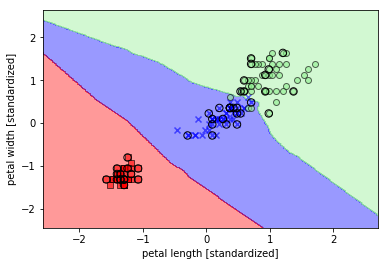

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

- `knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")`
    + `n_neighbors` : 몇 개의 이웃을 선택할건지. k에 해당
    + `p` : 1이면 맨해튼 거리, 2면 유클리디안 거리
    + `metric` : 거리 메트릭 선택